<span style="font-size:2em;">**Students Performance in Exams**</span>

This dataset contains marks of students in math, reading and writing. The main objective of analyzing these data is to understand which factors influence student performance the most. The variables considered are ethnicity, the level of education of the parents, diet and the way in which the student prepares for the exams.

This dataset is composed of the following variables:

- **gender:** Male or female.
- **race/ethnicity:** Grouped from A to E.
- **parental level of education:** Grouped from high school to master's degree.
- **lunch:** Type of lunch (standard or reduced).
- **test preparation course:** If a student did the test preparation course before the exams.
- **math score**
- **reading score**
- **writing score**

# Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

# Descriptive Statistics

Load the dataset, look at the descriptive statistics and check for missing values is the first thing to do.

In [5]:
students_df = pd.read_csv('../data/raw/StudentsPerformance.csv')

In [6]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
students_df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


The lowest average score is math, which is also the only subject that had 0 as a minimum.

There were students with maximum scores in the three subjects.

Note that the standard deviation does not differ much between subjects.

In [13]:
students_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset.

# Data Processing

First, we are renaming the columns and their values for plotting purposes.

In [16]:
students_df.rename(columns={'gender': 'Gender', 
                   'race/ethnicity': 'Ethnicity', 
                   'parental level of education': 'Parental Level of Education',
                   'lunch': 'Lunch',
                   'test preparation course': 'Test Preparation Course',
                   'math score': 'Math Score',
                   'reading score': 'Reading Score',
                   'writing score': 'Writing Score',}, inplace=True)

In [17]:
students_df["Gender"].replace({"male": "Male", "female": "Female"}, inplace=True)
students_df["Ethnicity"].replace({"group A": "Group A", "group B": "Group B",
                                  "group C": "Group C","group D": "Group D",
                                  "group E": "Group E"}, inplace=True)
students_df["Parental Level of Education"].replace({"some college": "Some College", 
                                                    "associate's degree": "Associate's Degree",
                                                    "high school": "High School",
                                                    "some high school": "Some High School",
                                                    "bachelor's degree": "Bachelor's Degree",
                                                    "master's degree": "Master's degree"}, inplace=True)
students_df["Lunch"].replace({"standard": "Standard", "free/reduced": "Free/Reduced"}, inplace=True)
students_df["Test Preparation Course"].replace({"none": "None", "completed": "Completed"}, inplace=True)

Also, let's create a USA GPA column that will be useful throughout the analysis.

In [18]:
grades_mapper = {'A': 90, 'B': 80, 'C': 70, 'D': 60}

def calc_usa_gpa(score):
    for grade, threshold in grades_mapper.items():
        if score >= threshold:
            return grade
    return 'F'
    
students_df["Math GPA"] = students_df.apply(lambda x : calc_usa_gpa(x["Math Score"]), axis=1)
students_df["Reading GPA"] = students_df.apply(lambda x : calc_usa_gpa(x["Reading Score"]), axis=1)
students_df["Writing GPA"] = students_df.apply(lambda x : calc_usa_gpa(x["Writing Score"]), axis=1)

Before starting to visualize the data, we are just verifying that the GPA was calculated correctly.

In [22]:
students_df[["Math Score", "Math GPA", "Reading Score", "Reading GPA", "Writing Score", "Writing GPA"]].head()

,Math Score,Math GPA,Reading Score,Reading GPA,Writing Score,Writing GPA
0,72,C,72,C,74,C
1,69,D,90,A,88,B
2,90,A,95,A,93,A
3,47,F,57,F,44,F
4,76,C,78,C,75,C


Everything checks out!

# Data Visualization

**What is the proportion of students by gender?**

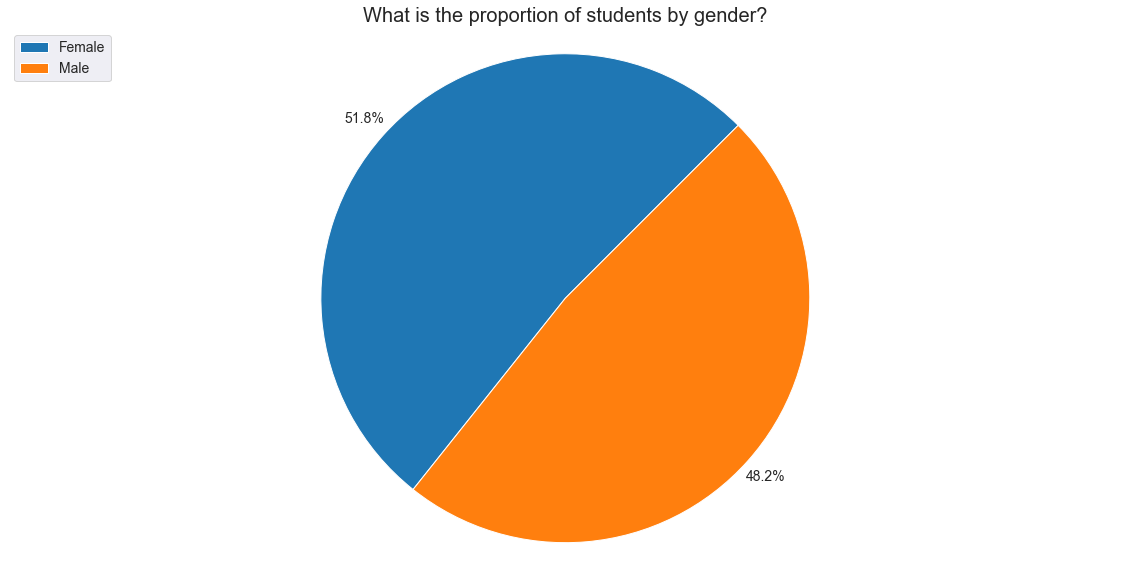

In [159]:
gender_counts = students_df["gender"].value_counts()
ax = gender_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 14})
ax.patch.set_facecolor('white')
plt.title('What is the proportion of students by gender?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=["Female", "Male"], loc="upper left", fontsize=14);

**How many students are there by race/ethnicity?**

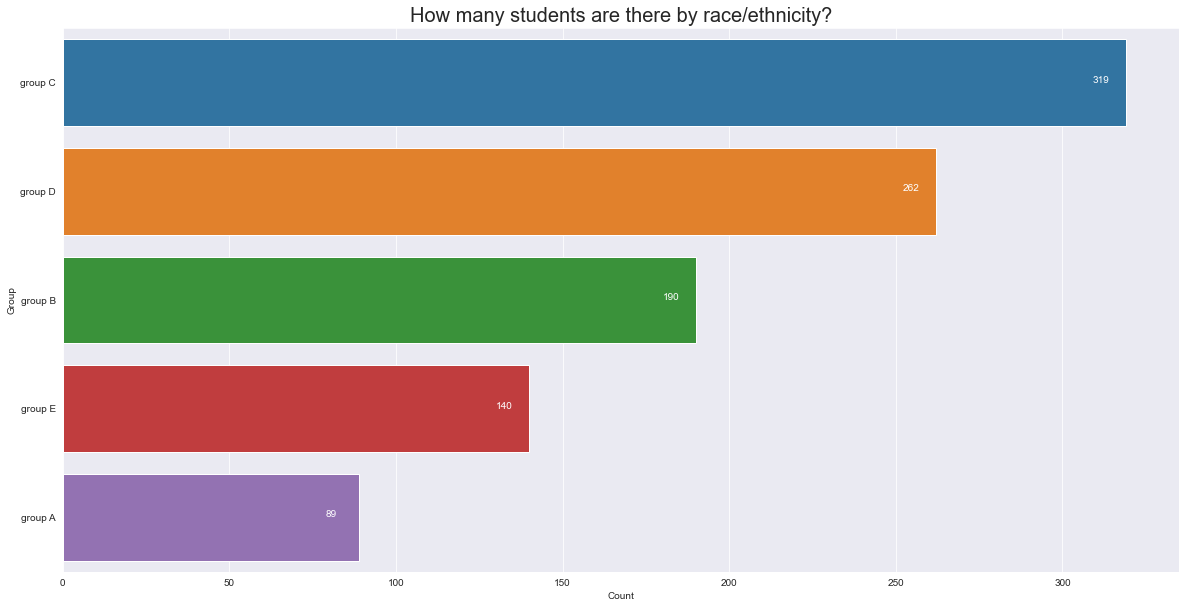

In [167]:
race_value_counts = students_df['race/ethnicity'].value_counts()

plt.figure(figsize=(20,10))
ax = sns.barplot(x=race_value_counts.values, y=race_value_counts.index, orient='h')
ax.set_title("How many students are there by race/ethnicity?", size=20)
ax.set(xlabel="Count", ylabel="Group")

# Annotate value labels to each type
for index, value in enumerate(race_value_counts): 
    plt.annotate(value, xy=(value-10, index), color='white') 

**What is the level of education of the parents?**

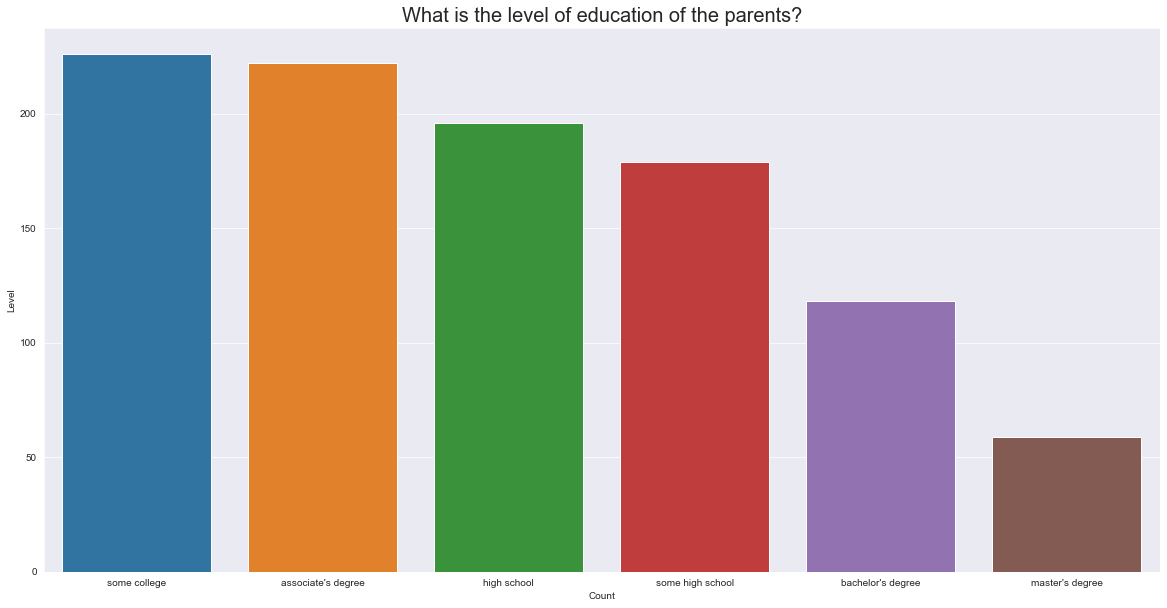

In [172]:
race_value_counts = students_df['parental level of education'].value_counts()

plt.figure(figsize=(20,10))
ax = sns.barplot(x=race_value_counts.index, y=race_value_counts.values,)
ax.set_title("What is the level of education of the parents?", size=20)
ax.set(xlabel="Count", ylabel="Level")

# Annotate value labels to each type
for index, value in enumerate(race_value_counts): 
    plt.annotate(value, xy=(value-10, index), color='white') 

Thw above plot shows most of the parents went to some college or had associate's degree and there are very less people who had higher studies.

**How many students passed in Math exam?**

**How many students pass in all exams?**

**RACE VS PARENTAL LEVEL OF EDUCATION -  TREEMAP**

**Which lunch type is preferred?**

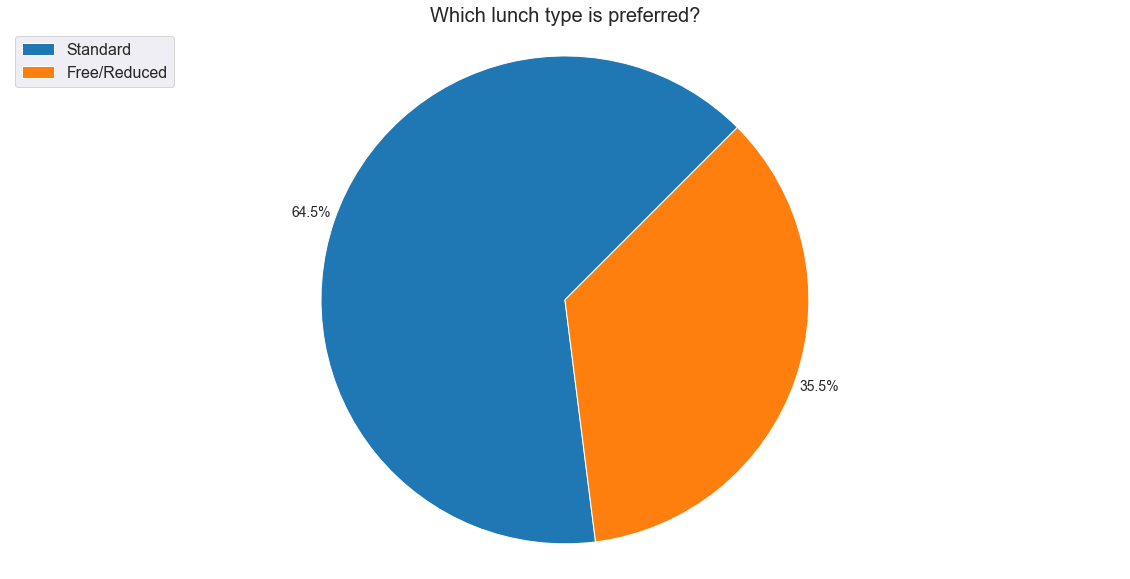

In [188]:
lunch_counts = students_df["lunch"].value_counts()
ax = lunch_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 14})
ax.patch.set_facecolor('white')
plt.title('Which lunch type is preferred?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=["Standard", "Free/Reduced"], loc="upper left", fontsize=16);

**How many students did the test preparation course?**

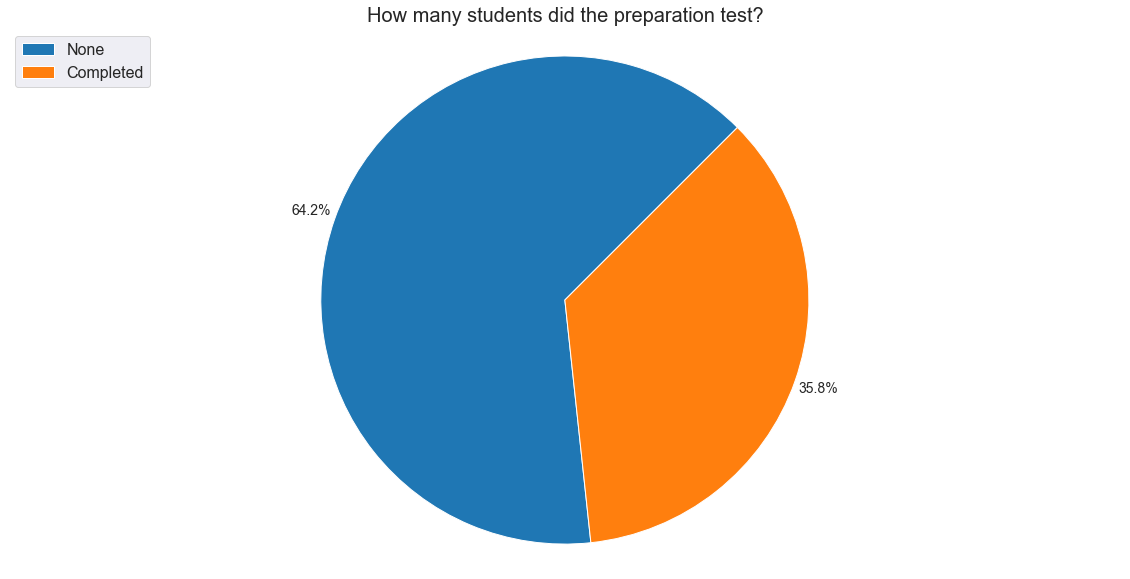

In [190]:
test_preparation_counts = students_df["test preparation course"].value_counts()
ax = test_preparation_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 14})
ax.patch.set_facecolor('white')
plt.title('How many students did the preparation course?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=["None", "Completed"], loc="upper left", fontsize=16);

**GRADES BY GENDER**

countplot

**GRADES BY SUBJECT BY GENDER**

Donut

The majority of students who earned an O grade were female.
Majority of students received B grade followed by C.
More female students received A and B Grade relative to male students.
More number of boys received D and E grade.
Almost similar number of both, male and female, got F grade.

**How are scores distributed?**

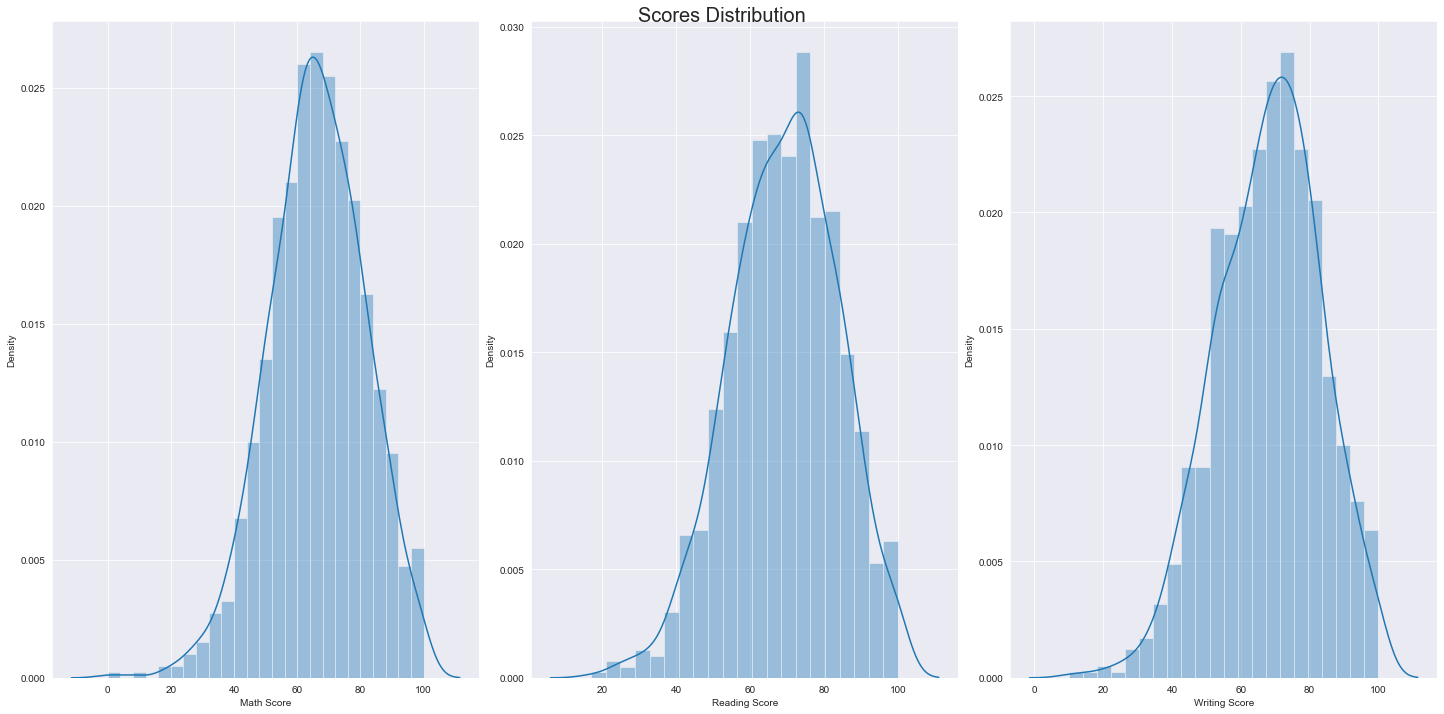

In [240]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in students_df[["math score", "reading score", "writing score"]].items():
    sns.distplot(value, ax=ax[index])
    ax[index].set(xlabel=col.title(), ylabel="Density")
    index += 1
fig.suptitle("Scores Distribution", fontsize=20)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**How do gender and race/ethnicity influence scores?**

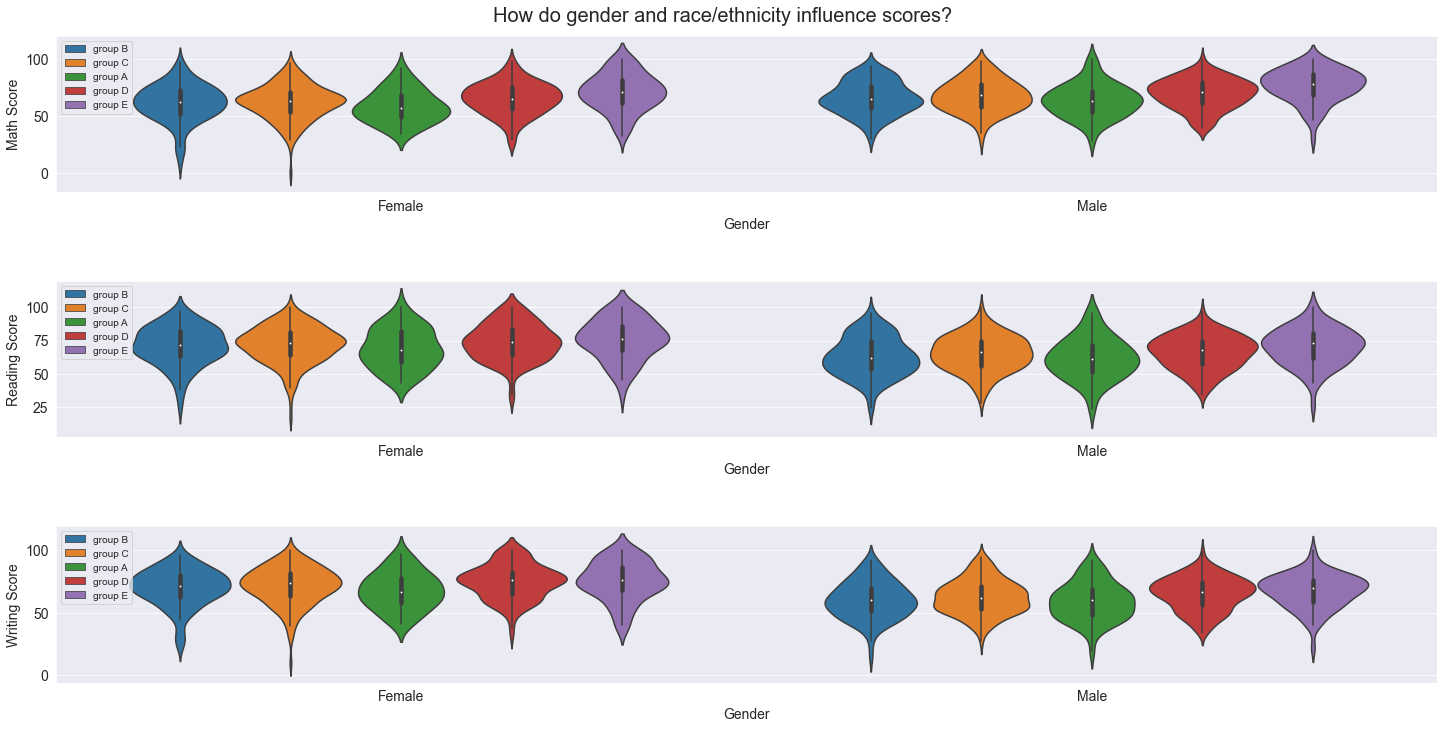

In [254]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["math score", "reading score", "writing score"]):
    sns.violinplot(x="gender", y=col, hue="race/ethnicity", data=students_df, ax=ax[index])
    ax[index].set_xlabel("Gender", fontsize=14)
    ax[index].set_ylabel(col.title(), fontsize = 14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)
    ax[index].legend(loc="upper left")
    
fig.suptitle("How do gender and race/ethnicity influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Performance by students in math section is lower when compared to reading and writing.

Best performance is in reading section

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

Performance of Group E is the best among all. While group D and C have nearly similar performance.
The average of group E is highest among all the groups while the average of group A is lowest.


**How do gender and parental level of education influence scores?**

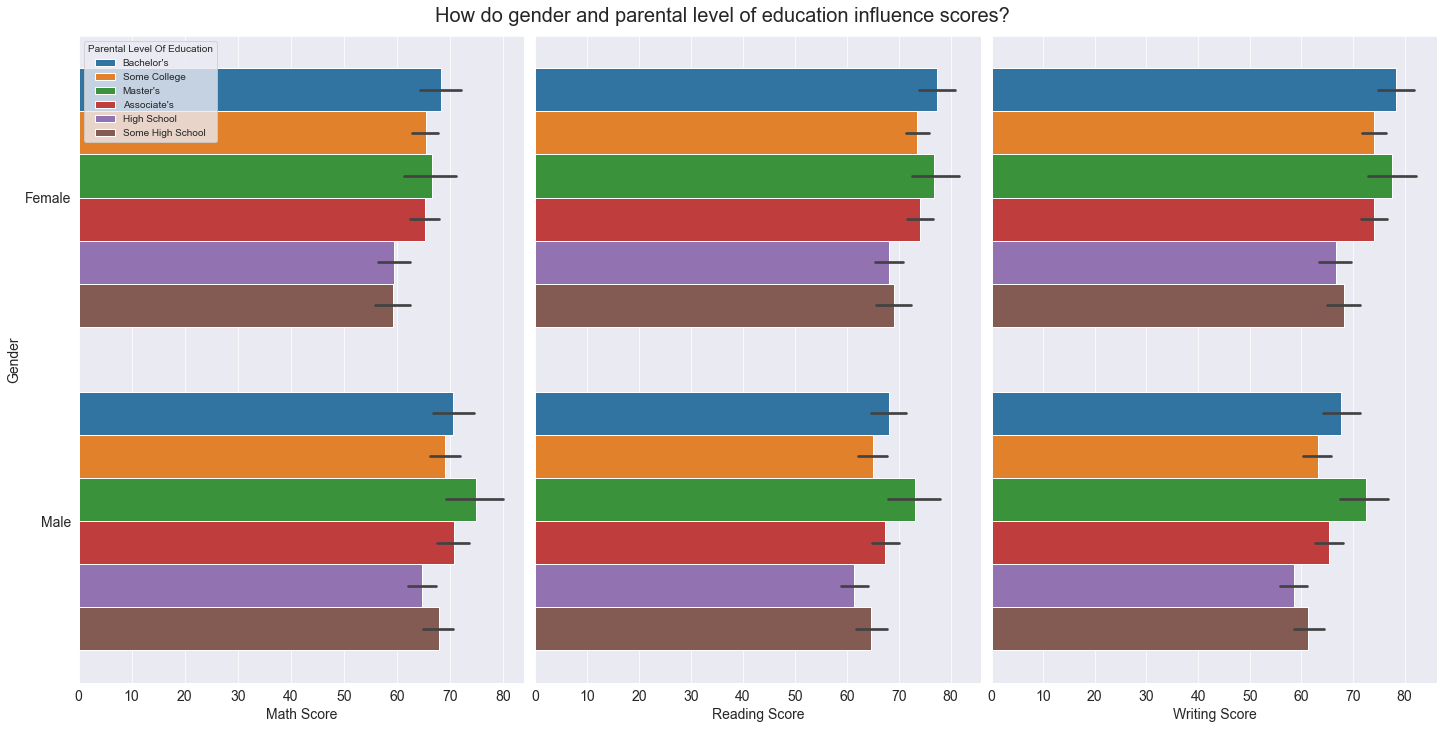

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["math score", "reading score", "writing score"]):
    sns.barplot(x=col,
            y="gender", 
            hue="parental level of education",
            data=students_df,
            ax=ax[index])
    ax[index].set_xlabel(col.title(), fontsize = 14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)
    if index > 0:
        ax[index].set_ylabel(None)
        ax[index].set_yticks([])
        ax[index].legend().set_visible(False)
    else: 
        ax[index].set_ylabel("Gender", fontsize=14)
        ax[index].legend(ax[index].get_legend_handles_labels()[0], 
                         ["Bachelor's", "Some College", "Master's", "Associate's", "High School", "Some High School"], 
                         loc="upper left",
                         title="Parental Level Of Education")
    
fig.suptitle("How do gender and parental level of education influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

From the above plot its clear that if the parental education is better their children tend to score better in all areas (math, reading, writing).

Students whose parents hold a master's degree have a higher overall percentage. 
Students whose parental education level is 'high school' and 'some high school' have lower overall percentage.


Females whose parents hold a Bachelor's degree, followed by master's degree,are more successful.
Males whose parents hold a Bachelor's degree and master's degree have similar academic performance

Reading Score has the highest average.

**How do gender and lunch type influence scores?**

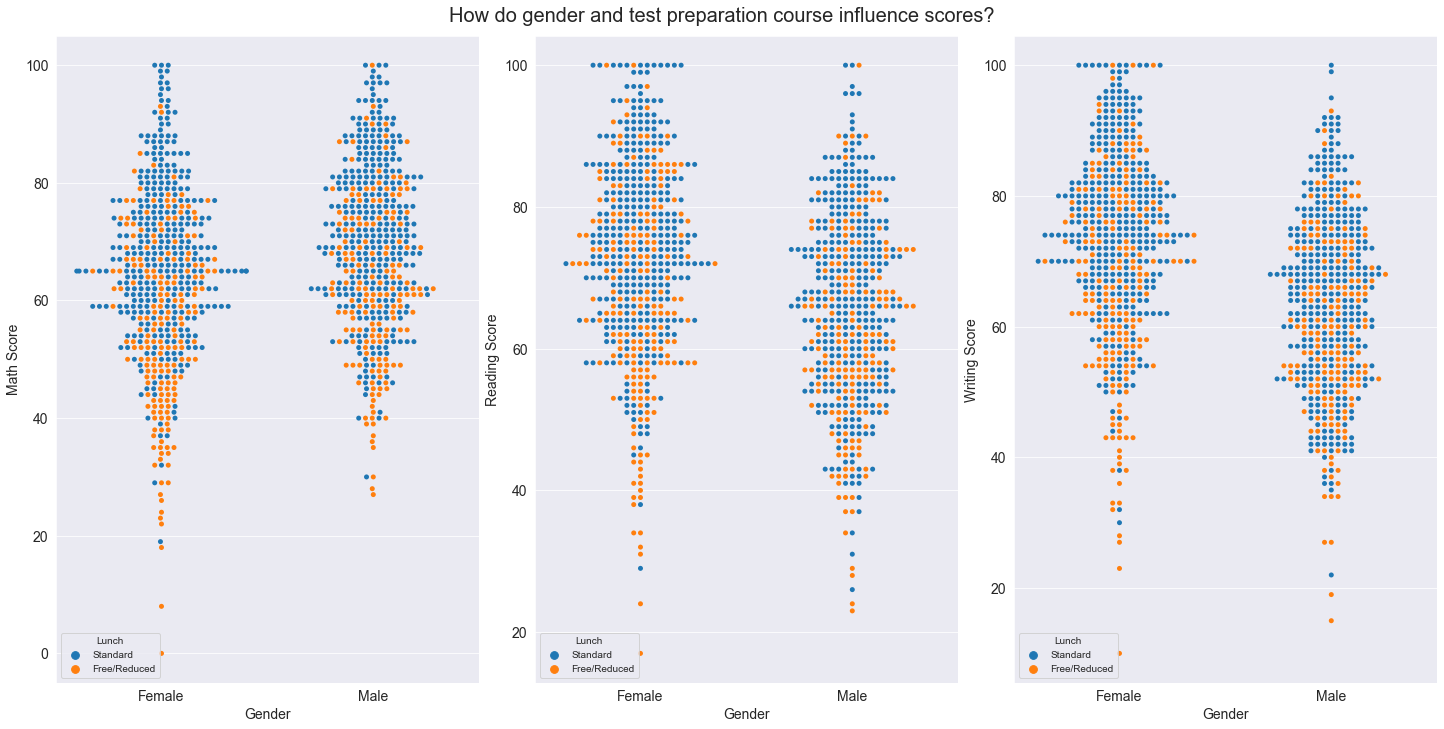

In [222]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["math score", "reading score", "writing score"]):
    sns.swarmplot(x="gender", y=col, hue="lunch", data=students_df, ax=ax[index])
    ax[index].set_xlabel("Gender", fontsize = 14)
    ax[index].set_ylabel(col.title(), fontsize = 14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)
    ax[index].legend(ax[index].get_legend_handles_labels()[0], ["Standard", "Free/Reduced"], title="Lunch", loc="lower left")
    
fig.suptitle("How do gender and test preparation course influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In all the cases the scores are higher by having the standard lunch.

Notice the range 75 to 100 in the above visualization.

Students who had the standard lunch have performed very well.
Students who had the free/reduced lunch have not performed so well.
It is very evident that food and nutriention play a vital role in the growth of a student both, physically and academically. Nutrition plays a key role in the healthy development of the children. Nutritious foods provide the body and mind with the energy needed to grow, feel well, be active, stay healthy and learn. Students are able to learn better when they're well nourished, and eating healthy meals has been linked to higher grades, better memory and alertness, and faster information processing.

Healthy students are better learners.

**How do gender and test preparation course influence scores?**

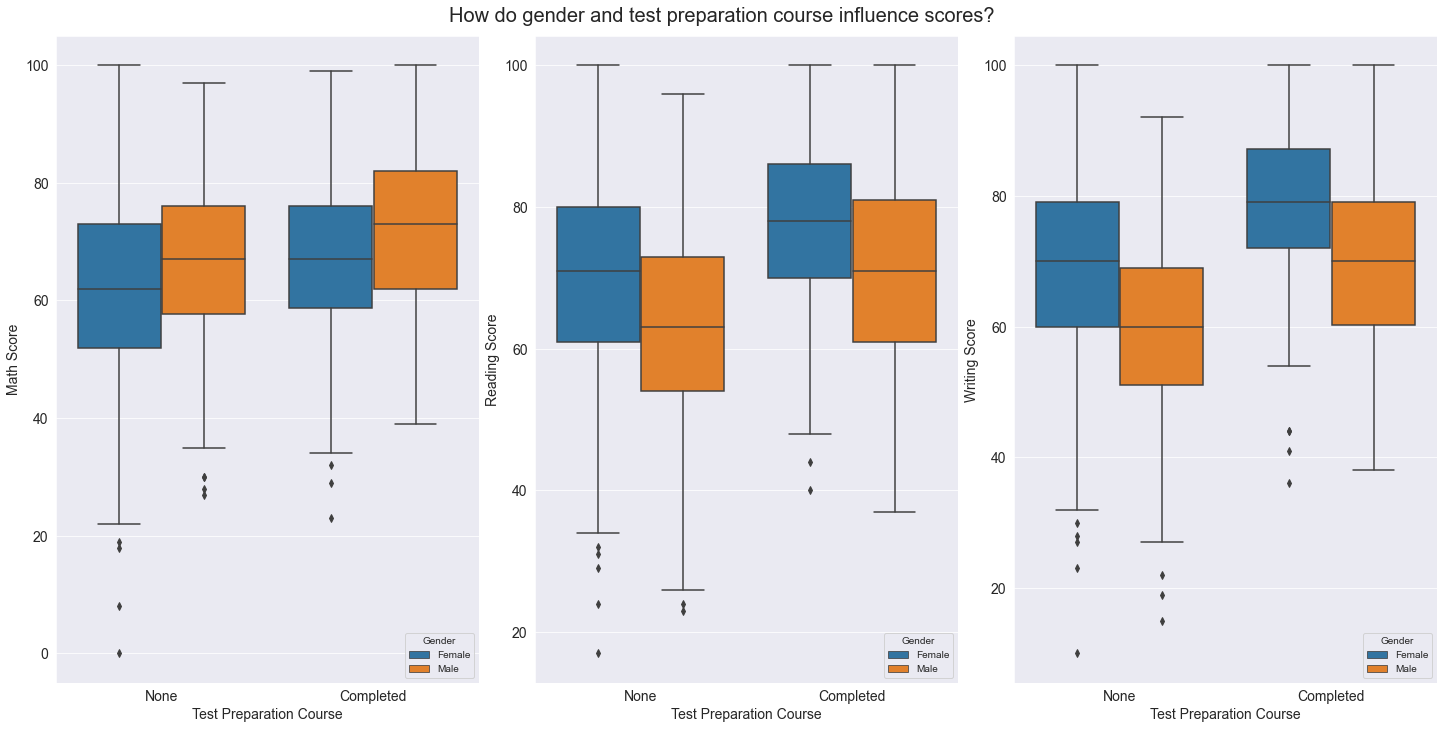

In [203]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["math score", "reading score", "writing score"]):
    sns.boxplot(x=students_df['test preparation course'],y=students_df[col], hue=students_df['gender'], ax=ax[index])
    ax[index].set_xlabel("Test Preparation Course", fontsize = 14)
    ax[index].set_ylabel(col.title(), fontsize = 14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)
    ax[index].legend(ax[index].get_legend_handles_labels()[0], ["Female", "Male"], title="Gender")
    
fig.suptitle("How do gender and test preparation course influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

From the first plot we can see the math scores of boys are better irrespective of wether they completed the course or no.

From the next two plots we can see that girls perform more better in reading and writing

From all three graphs its clear that if the course is completed we can achieve higher scores

From the above visualization we can infer that :

Students who have completed their test preparations have definitely scored better.
While a few students who did not complete their test preparations have not performed so well.

We can notice that there are few who have scored exceptionally good compared to others even when they did not complete their test perparation.

Also, there are very few who completed their test preparation but still scored low percentage.

(We always have few exceptions.)

**How are the different subject scores related?**

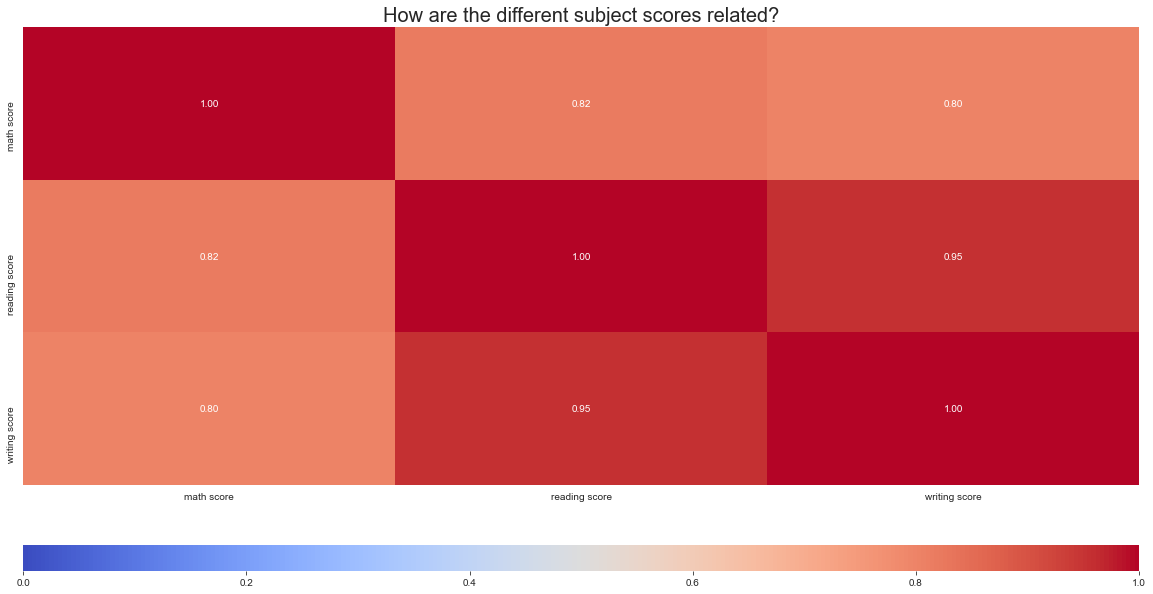

In [223]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(students_df.corr(),
            annot= True,
            fmt = ".2f",
            vmin = 0,
            vmax = 1,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap='coolwarm')
ax.set_title('How are the different subject scores related?', size = 20);

Writing_score and reading_score are also highly correlated which tells us that if a student reads well then he/she also writes well.
Math_score doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa

Almost all the scores are close to each other. There is average success in all three course.

<Figure size 1440x720 with 0 Axes>

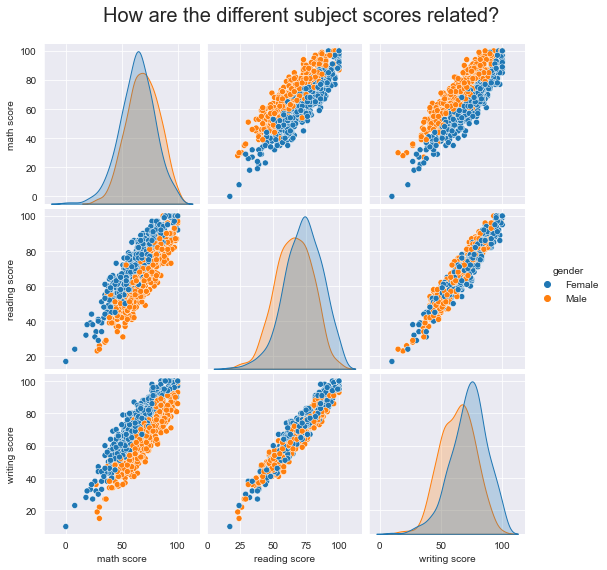

In [242]:
plt.figure(figsize=(20,10))
g = sns.pairplot(students_df[["math score", "reading score", "writing score", "gender"]], hue="gender");
g.fig.suptitle("How are the different subject scores related?", size=20, y=1.05);

From the above plot it is clear that all the scores increase linearly with each other.

Most students fall between the range of 40 to 85 marks in both the courses, mathematics and writing.

**How are the races, scores, gender and lunch type related?**

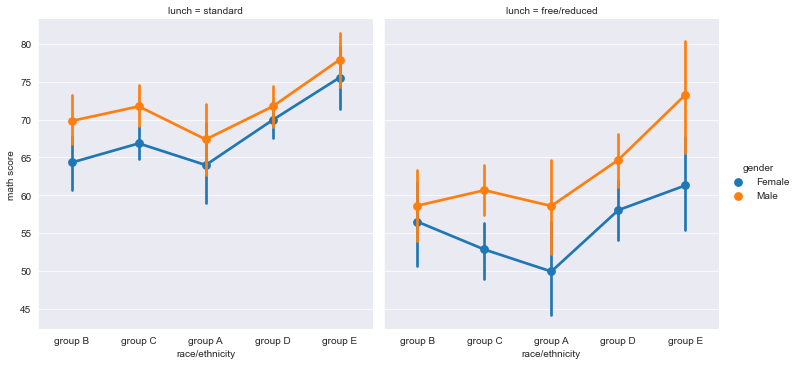

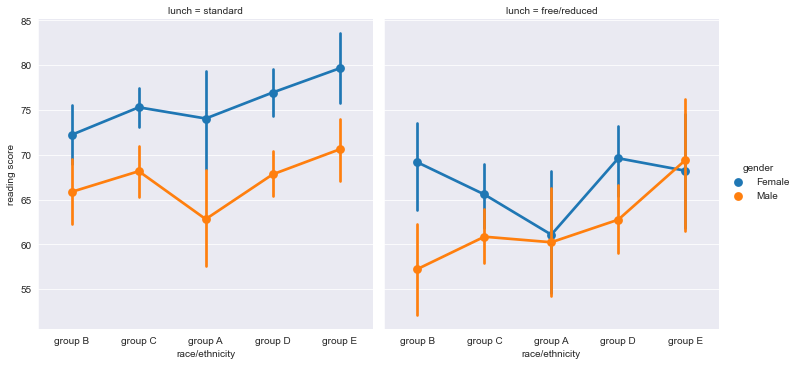

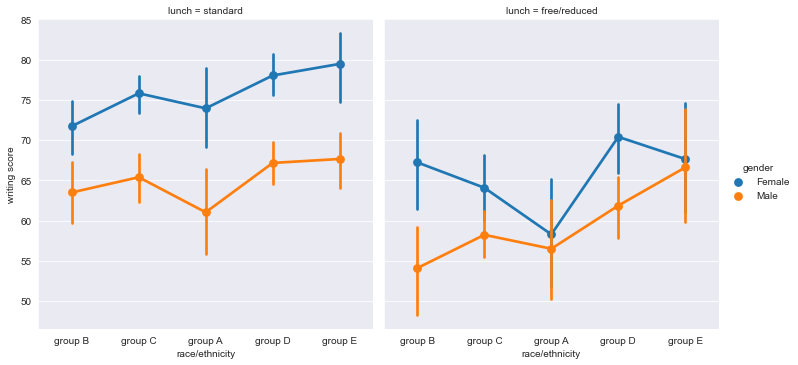

In [243]:
sns.factorplot(x="race/ethnicity", y="math score", hue="gender",col='lunch',data=students_df)
sns.factorplot(x="race/ethnicity", y="reading score", hue="gender",col='lunch',data=students_df)
sns.factorplot(x="race/ethnicity", y="writing score", hue="gender",col='lunch',data=students_df)

**How are the races, scores, gender and test preparation course related?**

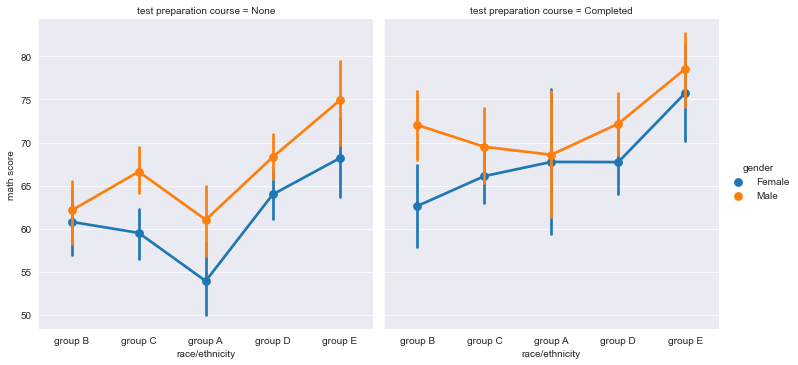

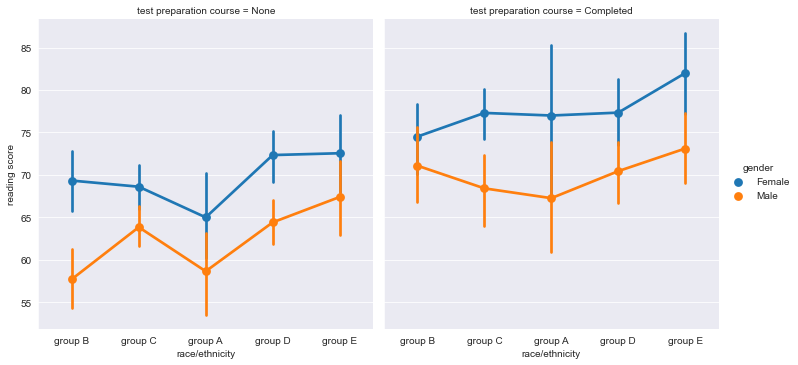

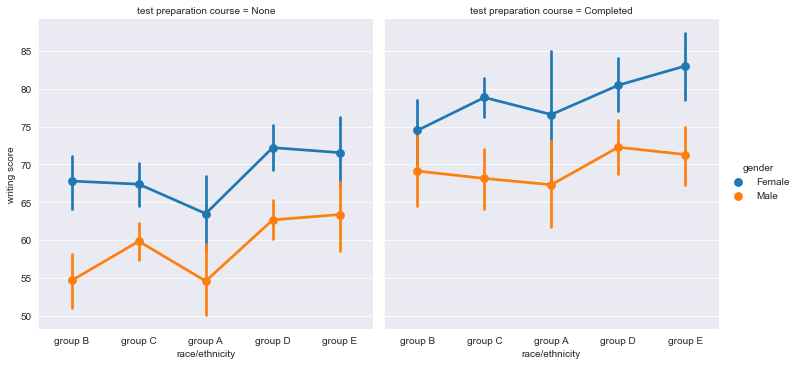

In [245]:
sns.factorplot(x="race/ethnicity", y="math score", hue="gender",col='test preparation course',data=students_df)
sns.factorplot(x="race/ethnicity", y="reading score", hue="gender",col='test preparation course',data=students_df)
sns.factorplot(x="race/ethnicity", y="writing score", hue="gender",col='test preparation course',data=students_df)

**How are the parental level of education, scores, gender and lunch type related?**

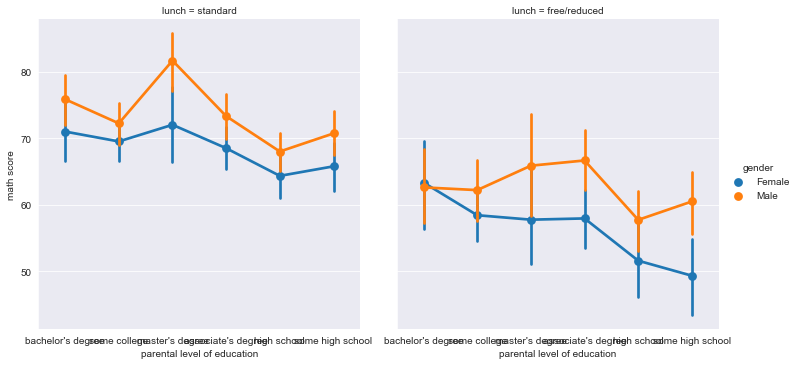

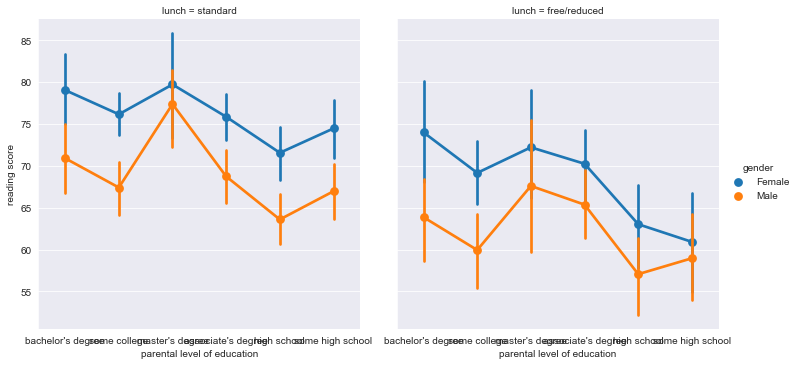

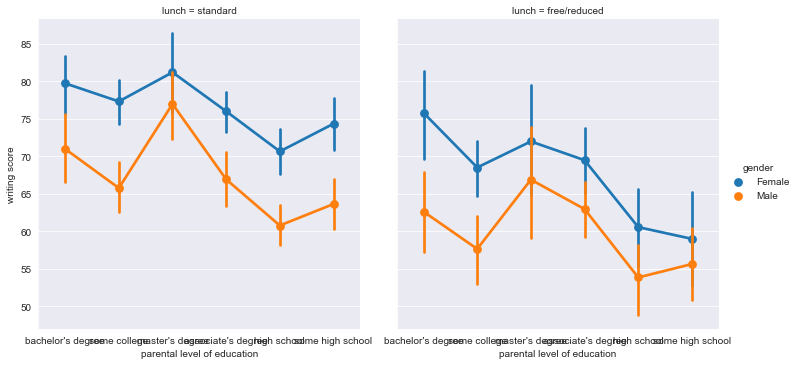

In [247]:
sns.factorplot(x="parental level of education", y="math score", hue="gender",col='lunch',data=students_df)
sns.factorplot(x="parental level of education", y="reading score", hue="gender",col='lunch',data=students_df)
sns.factorplot(x="parental level of education", y="writing score", hue="gender",col='lunch',data=students_df)

**How are the parental level of education, scores, gender and test preparation course related?**

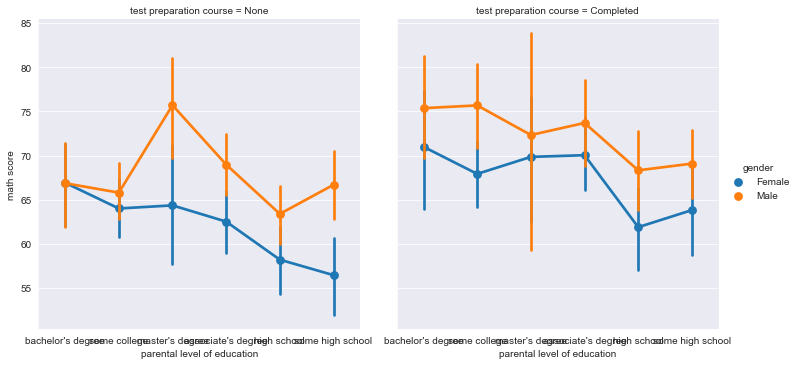

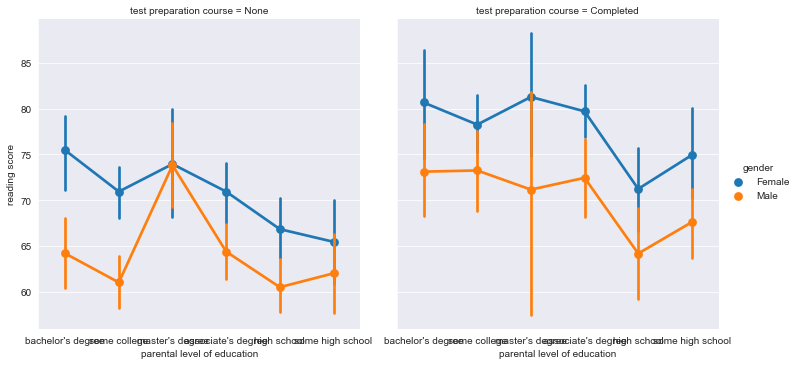

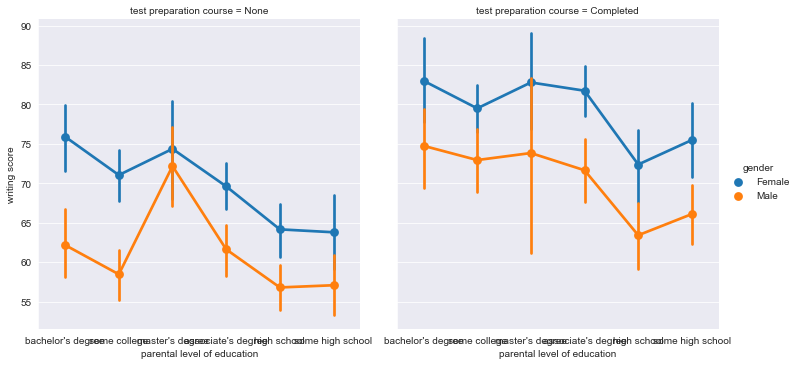

In [246]:
sns.factorplot(x="parental level of education", y="math score", hue="gender",col='test preparation course',data=students_df)
sns.factorplot(x="parental level of education", y="reading score", hue="gender",col='test preparation course',data=students_df)
sns.factorplot(x="parental level of education", y="writing score", hue="gender",col='test preparation course',data=students_df)

INSIGHT : After Univariate Analysis we got :

51.8% Students are Male and 48.2% Students are Female.And most of the Students are From Group C
Most of the Students have High School Parental Level of Education.Also 64.5% Students taking Standard Lunch and 35.5% 
Students taking Free/Reduced Lunch

64.2% Students Completed the Test Prepration Course and 35.8% Students didn't.
Most of the students have Math Score 58-78.Although there are some of the values which are below than 30. That means some of the Students can't pass the Math Test.And same With Reading and Writing Score.
Most of the Students Have Reading Score (70-80) , Writing Score (66-80) , and Percentage (60-80).

INSIGHT: By doing Bi-Variate Analysis,We Got:

The Average Math Score Of Male and Female Students are 69 and 64. Avg. Reading Score 65 for Male and 73 for Female and Avg. Writing Score 63 for Male and 72 For Female.So the Overall Avg %age of Female are 70 and male are 66. Also one more thing Most of the Female students belong to Group C and Male students from Group C,D.
The Over All perecentage of Students From Group E is Good on Average 74% .
The Students Whose Parental Level of Education is Masters are good in Overall With AVg Percentage in all Reading,Writing,Math-score is 73.
On Basis of Lunch %age of Students in all Reading,Writing,Math-score 72 for Standard Lunch and 62 for Free Lunch .
The Students Who Completed The Test Prepration Course got Overall Average Percentage 73 and Students who doesn't Completed Got Overall Average Percentage 65.

# References

1. https://www.kaggle.com/kralmachine/seaborn-tutorial-for-beginners
2. https://www.kaggle.com/nitindatta/students-performance-in-exams-eda-in-depth
3. https://www.kaggle.com/subinium/basic-of-statistical-viz-plotly-seaborn
4. https://waynestalk.com/en/python-pie-donut-sunburst-charts-en/
5. https://www.kaggle.com/bhartiprasad17/student-academic-performance-analysis
6. https://www.kaggle.com/abdokamr/eda-by-seaborn-feature-engineering-for-beginners